<a href="https://colab.research.google.com/github/QaziSaim/DeepLearning--DeepNeuralNetwork-/blob/main/multioutput_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generate synthetic data
num_samples = 1000
input_dim = 10
output_dim1 = 1
output_dim2 = 1

# Features
X = np.random.rand(num_samples, input_dim)

# Targets with two different outputs
y1 = X[:, 0] * 0.5 + np.random.rand(num_samples) * 0.1  # Example target 1
y2 = X[:, 1] * 0.7 + np.random.rand(num_samples) * 0.1  # Example target 2

In [2]:
X_train,X_test,y1_train,y1_test,y2_train,y2_test = train_test_split(X,y1,y2,test_size=0.2,random_state=42)

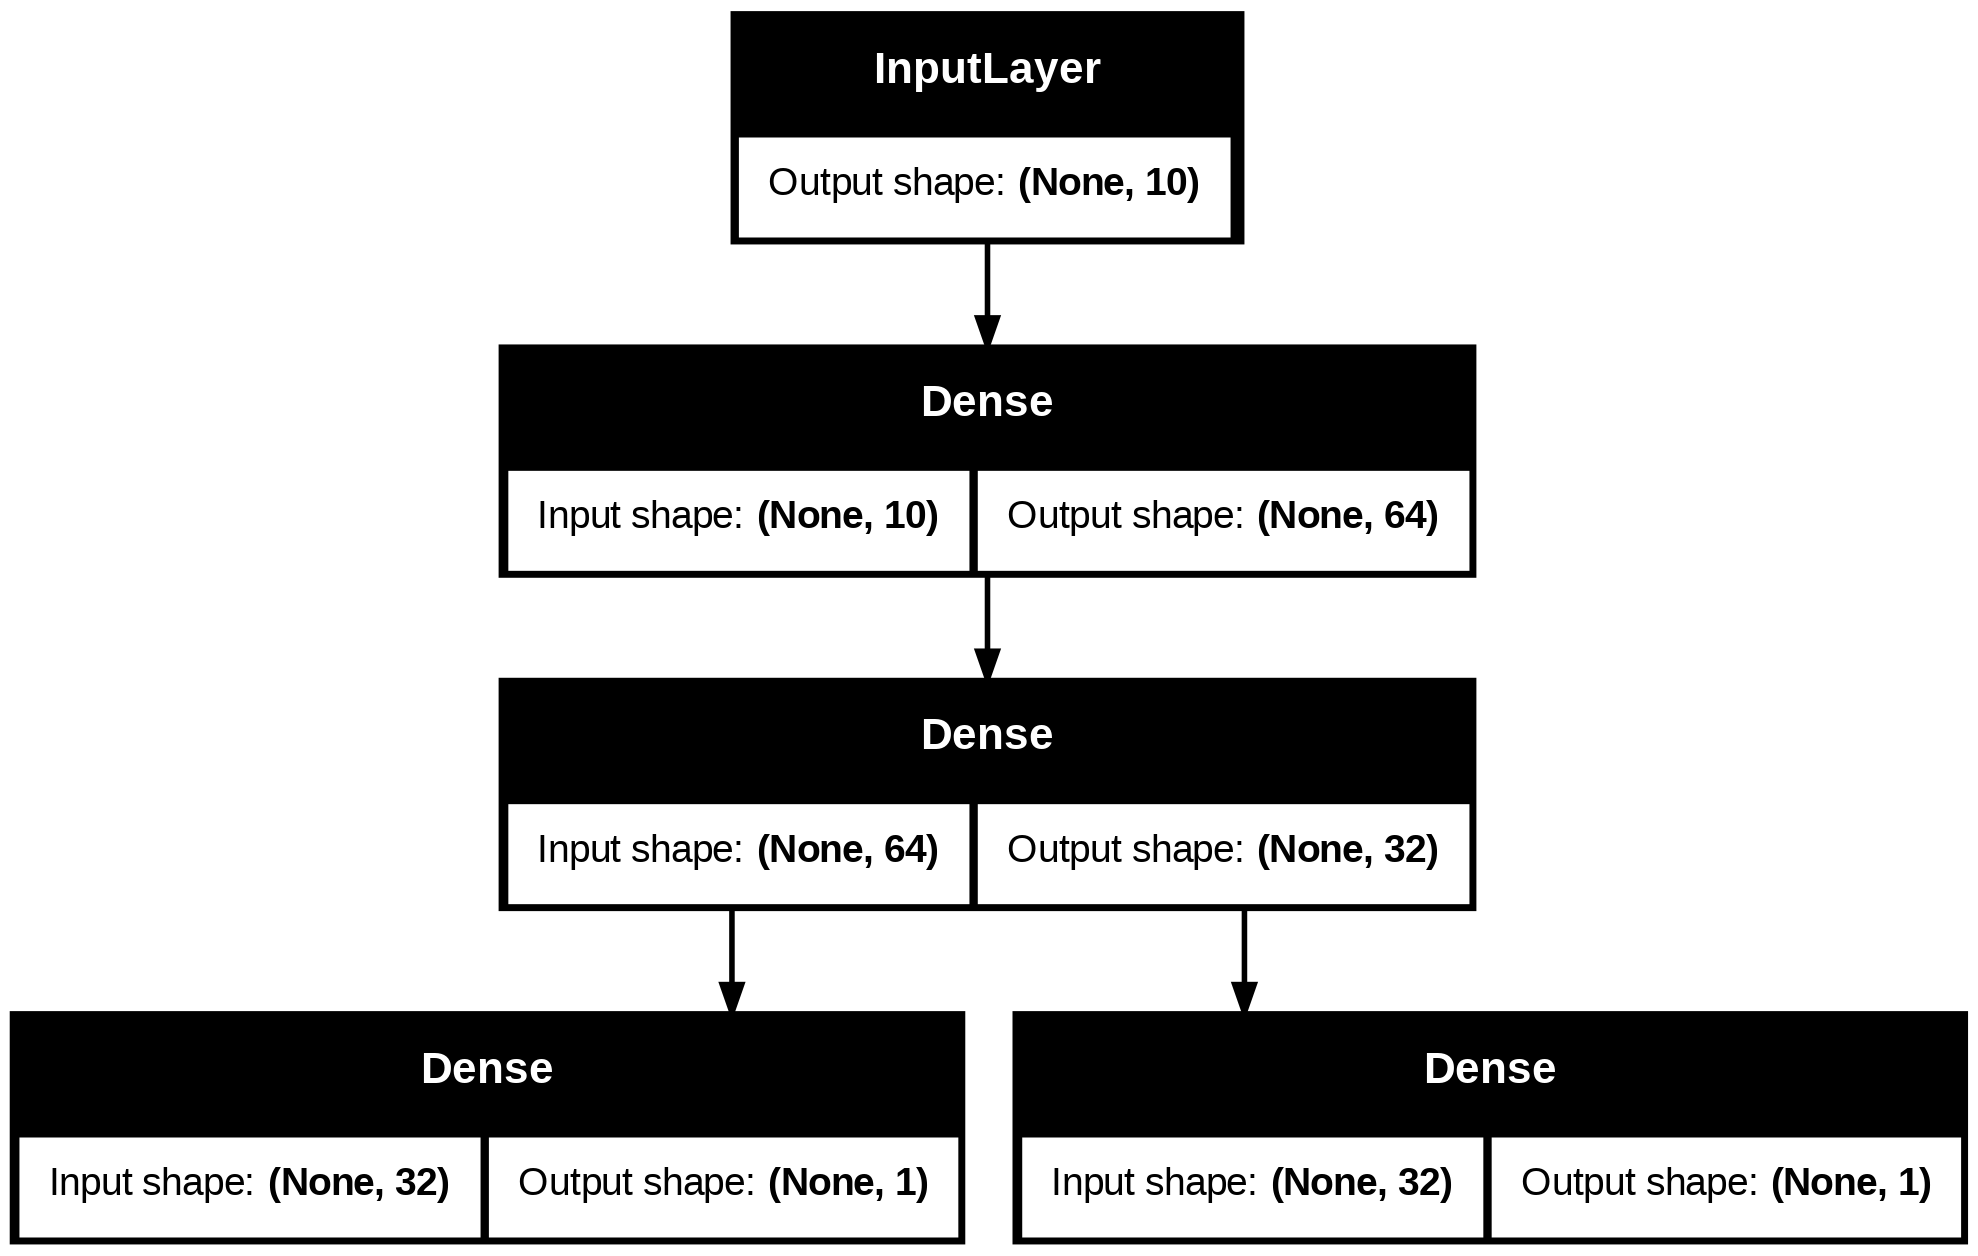

In [3]:
inputs = Input(shape = (X_train.shape[1],))
x = Dense(64,activation='relu')(inputs)
x = Dense(32,activation='relu')(x)
output1 = Dense(output_dim1,name='output1')(x)
output2 = Dense(output_dim1,name='output2')(x)
model = Model(inputs=inputs,outputs=[output1,output2])
import keras
keras.utils.plot_model(model,show_shapes=True)

In [10]:
model.compile(loss={output1:'mse',output2:'mse'},optimizer='Adam',metrics={output1:'mae',output2:'mae'})

In [12]:
history = model.fit(
    X_train,
    {'output1': y1_train, 'output2': y2_train},
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model
loss, mae_output1, mae_output2 = model.evaluate(
    X_test,
    {'output1': y1_test, 'output2': y2_test}
)
print(f"Test loss: {loss:.4f}")
#print(f"Test loss for output1: {loss_output1:.4f}")
#print(f"Test loss for output2: {loss_output2:.4f}")
print(f"Test MAE for output1: {mae_output1:.4f}")
print(f"Test MAE for output2: {mae_output2:.4f}")

# Print model summary
model.summary()


Epoch 1/30


ValueError: Expected keys ListWrapper(['output1', 'output2']) in loss dict, but found loss.keys()=[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_3>, <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_4>]

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generate synthetic data
num_samples = 1000
input_dim = 10
output_dim1 = 1
output_dim2 = 1

# Features
X = np.random.rand(num_samples, input_dim)

# Targets with two different outputs
y1 = X[:, 0] * 0.5 + np.random.rand(num_samples) * 0.1  # Example target 1
y2 = X[:, 1] * 0.7 + np.random.rand(num_samples) * 0.1  # Example target 2

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=0)

# Define the model using the Functional API
inputs = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)

# Two separate output layers for the two outputs
output1 = Dense(output_dim1, name='output1')(x)
output2 = Dense(output_dim2, name='output2')(x)

# Create the model
model = Model(inputs=inputs, outputs=[output1, output2])

# Compile the model
model.compile(optimizer='adam', loss={'output1':'mse','output2':'mse'}, metrics={'output1': 'mae', 'output2': 'mae'})

# Train the model
history = model.fit(
    X_train,
    {'output1': y1_train, 'output2': y2_train},
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model
loss, mae_output1, mae_output2 = model.evaluate(
    X_test,
    {'output1': y1_test, 'output2': y2_test}
)
print(f"Test loss: {loss:.4f}")
#print(f"Test loss for output1: {loss_output1:.4f}")
#print(f"Test loss for output2: {loss_output2:.4f}")
print(f"Test MAE for output1: {mae_output1:.4f}")
print(f"Test MAE for output2: {mae_output2:.4f}")

# Print model summary
model.summary()


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1991 - output1_loss: 0.1284 - output1_mae: 0.2838 - output2_loss: 0.0707 - output2_mae: 0.2105 - val_loss: 0.1011 - val_output1_loss: 0.0505 - val_output1_mae: 0.1802 - val_output2_loss: 0.0506 - val_output2_mae: 0.1906
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0776 - output1_loss: 0.0362 - output1_mae: 0.1519 - output2_loss: 0.0414 - output2_mae: 0.1688 - val_loss: 0.0456 - val_output1_loss: 0.0245 - val_output1_mae: 0.1230 - val_output2_loss: 0.0210 - val_output2_mae: 0.1184
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0346 - output1_loss: 0.0189 - output1_mae: 0.1099 - output2_loss: 0.0157 - output2_mae: 0.1047 - val_loss: 0.0241 - val_output1_loss: 0.0149 - val_output1_mae: 0.0961 - val_output2_loss: 0.0091 - val_output2_mae: 0.0757
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179 - output1_loss: 0.0114 - output1_mae: 0.0852 - output2_loss: 0.0065 - output2_mae: 0.0662 - va

ValueError: too many values to unpack (expected 3)